In [1]:
import numpy as np
import tensorflow as tf # only these two packages required
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
tf.reset_default_graph()

In [45]:
x = tf.placeholder(tf.float32)
y = tf.square(x)

In [46]:
y

<tf.Tensor 'Square:0' shape=<unknown> dtype=float32>

In [47]:
sess = tf.InteractiveSession()

In [48]:
y.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  1.,   4.,   9.,  16.,  25.], dtype=float32)

In [49]:
# define the gradients of y with respect to x
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x)))

In [50]:
dy_dx

<tf.Tensor 'Squeeze:0' shape=<unknown> dtype=float32>

In [51]:
dy_dx.eval(feed_dict={x: 4})

8.0

In [52]:
dy_dx.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  2.,   4.,   6.,   8.,  10.], dtype=float32)

In [53]:
g = 9.8; mu = 0.5

In [54]:
acceleration = (g * (dy_dx + (-tf.sign(dy_dx) * mu))) / tf.sqrt(1 + tf.square(dy_dx))

In [55]:
acceleration.eval(feed_dict={x: 100})

9.7753782

# Define the simulation of these values

In [56]:
start_position = 100

In [76]:
position = start_position; velocity = 0 # initial velocity is 0
y_values = [position]

for _ in range(25):
    print "X = " + str(position) + " V = " + str(velocity)
    dx, a = sess.run((dy_dx, acceleration), feed_dict={x: position})
    dt = 1 / min(1, np.abs(dx))
    print "obtained_acceleration = " + str(a)
    print "obtained_dt = " + str(dt) + " obtained_dx = " + str(dx) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt * dt)))
    
    y_values.append(position)

X = 100 V = 0
obtained_acceleration = 9.77538
obtained_dt = 1 obtained_dx = 200.0

X = 85.3369326591 V = 9.77537822723
obtained_acceleration = 9.77112
obtained_dt = 1 obtained_dx = 170.674

X = 60.9048700333 V = 19.5465011597
obtained_acceleration = 9.75944
obtained_dt = 1 obtained_dx = 121.81

X = 26.7192025185 V = 29.3059453964
obtained_acceleration = 9.70661
obtained_dt = 1 obtained_dx = 53.4384

X = -17.1466531754 V = 39.0125522614
obtained_acceleration = -9.65301
obtained_dt = 1 obtained_dx = -34.2933

X = -41.6796870232 V = 29.3595399857
obtained_acceleration = -9.74052
obtained_dt = 1 obtained_dx = -83.3594

X = -56.4284491539 V = 19.6190214157
obtained_acceleration = -9.7562
obtained_dt = 1 obtained_dx = -112.857

X = -61.4131708145 V = 9.86282157898
obtained_acceleration = -9.75978
obtained_dt = 1 obtained_dx = -122.826

X = -56.6363182068 V = 0.103038787842
obtained_acceleration = -9.75636
obtained_dt = 1 obtained_dx = -113.273

X = -42.1048154831 V = -9.65332221985
obtained_

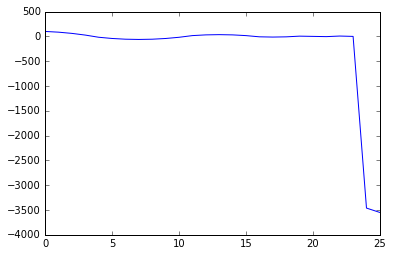

In [77]:
plt.plot(y_values)

In [41]:
position

4.4206496179103851